In [62]:
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import pickle
from calcwf import gen_wf, shifted_f, shifted_e, chirp2total, total2chirp, match_h1_h2, get_h, match_wfs, match_true_anomaly, match_hn

# Stripe origin

Let's start by overlaying a few waveforms along a 'stripe' in the ecc^2 against chirp mass plots to see what is constant between them all. Stripes are easily visible in h2/h1 plot, so let's start with this for n=4, no maximisation in order to find points along one such stripe. Due to limited resolution of grid that makes up ecc^2 against chirp plot, these points will not be exactly on the maxima of the stripes.

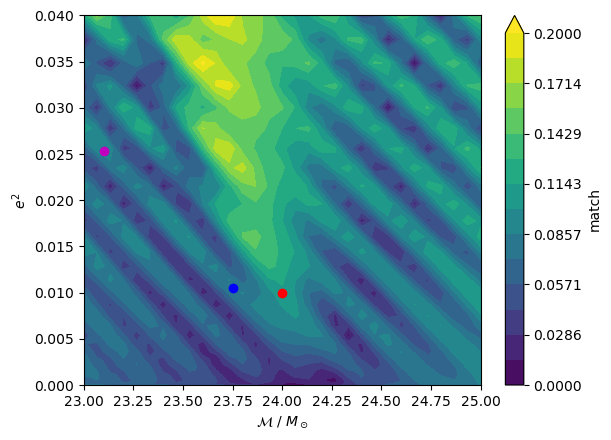

In [164]:
# Load ecc^2 against chirp mass plot
with open(os.path.join('e_sqrd_chirp_data', 'dataslot_8'), 'rb') as fp:
    data = pickle.load(fp)

# Plot data
e_vals = np.linspace(0, 0.2, 31)
chirp_vals = np.linspace(23, 25, 31)
plt.contourf(chirp_vals, e_vals**2, np.array(data['h2'])/np.array(data['h1']), np.linspace(0, 0.2, 15), vmin=0, vmax=0.2, extend='max')
plt.colorbar(label='match')
plt.scatter(24, 0.1**2, c='r', zorder=5)
plt.xlabel('$\mathcal{M}~/~M_\odot$')
plt.ylabel('$e^2$')

# Find two points along stripe manually
plt.scatter(23.75, 0.0105, c='b', zorder=3)
plt.scatter(23.1, 0.0253, c='m', zorder=3)

Let's plot waveforms from five points equally spaced along this line.

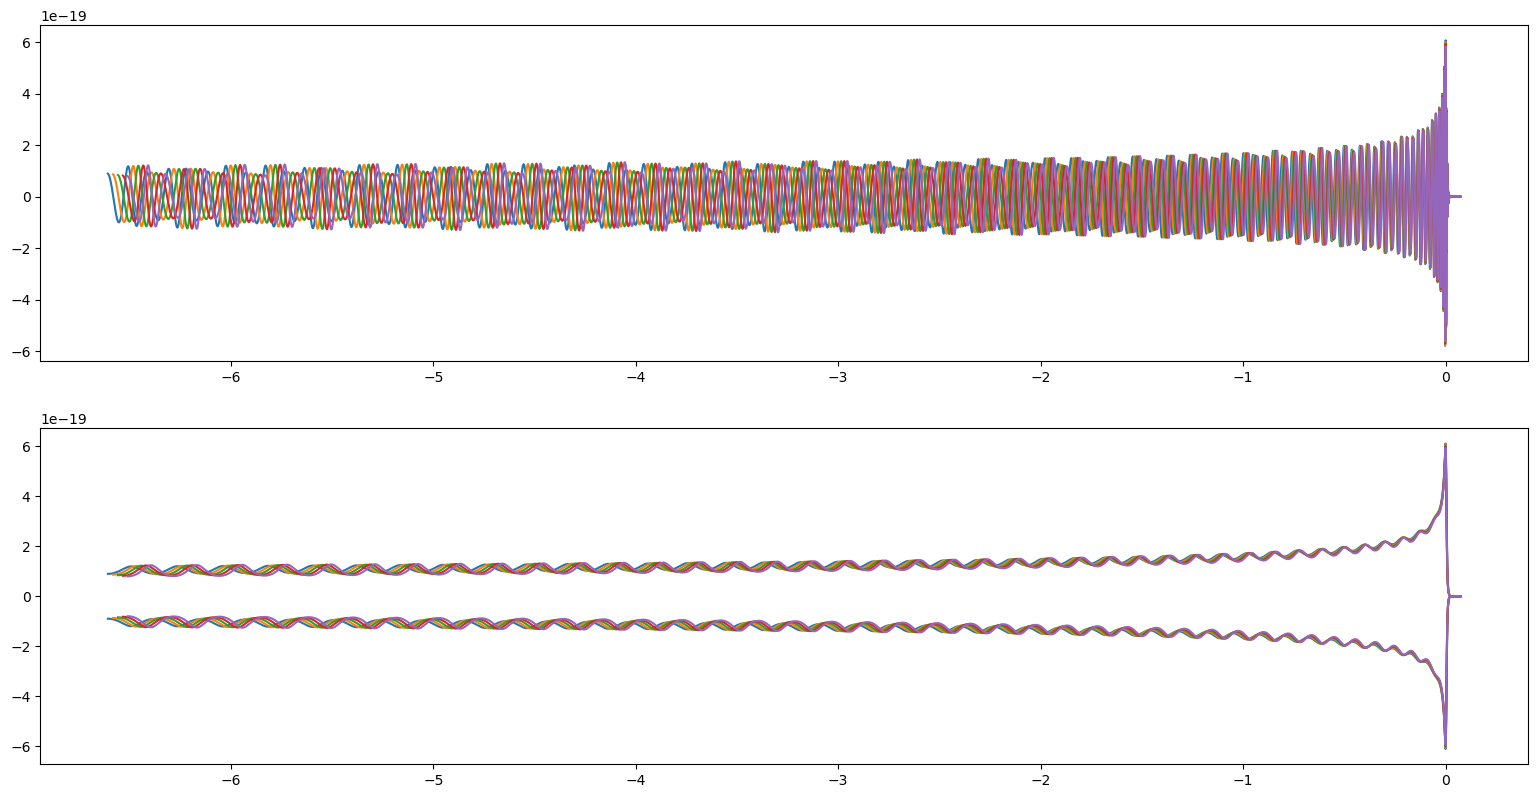

In [64]:
n_points = 5

# Points on line
bright_e2_range = [0.0105, 0.0253]
bright_chirp_range = [23.75, 23.1]
e2_vals = np.linspace(*bright_e2_range, n_points)
chirp_vals = np.linspace(*bright_chirp_range, n_points)
e_vals = np.sqrt(e2_vals)

# Generate and plot waveforms
plt.figure(figsize=(6.4*3,4.8*2))
for i in range(n_points):
    h = gen_wf(10, e_vals[i], chirp2total(chirp_vals[i], 2), 2, 4096, 'TEOBResumS')
    plt.subplot(2,1,1)
    plt.plot(h.sample_times, h, c=f'C{i}', label=f'e: {e_vals[i]:.3f}, chirp: {chirp_vals[i]:.3f}')
    plt.subplot(2,1,2)
    plt.plot(h.sample_times, np.abs(h), c=f'C{i}', label=f'e: {e_vals[i]:.3f}, chirp: {chirp_vals[i]:.3f}')
    plt.plot(h.sample_times, -np.abs(h), c=f'C{i}')

Appears that number of amplitude modulations is equal, such that the modulations line up at the end of the inspiral/merger. Let's now compare with a waveform in a 'dark strip' (i.e. a minimum of the match).

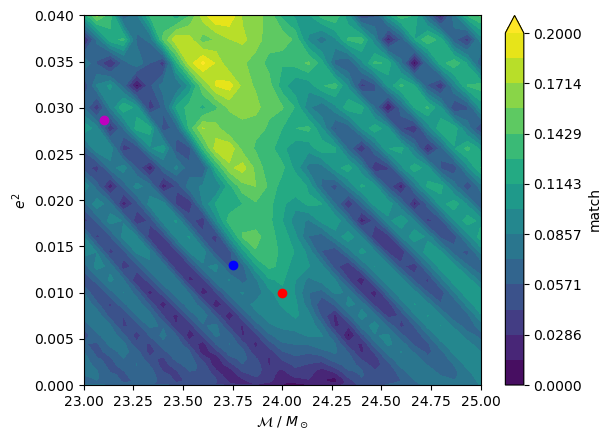

In [163]:
# Load ecc^2 against chirp mass plot
with open(os.path.join('e_sqrd_chirp_data', 'dataslot_8'), 'rb') as fp:
    data = pickle.load(fp)

# Plot data
e_vals = np.linspace(0, 0.2, 31)
chirp_vals = np.linspace(23, 25, 31)
plt.contourf(chirp_vals, e_vals**2, np.array(data['h2'])/np.array(data['h1']), np.linspace(0, 0.2, 15), vmin=0, vmax=0.2, extend='max')
plt.colorbar(label='match')
plt.scatter(24, 0.1**2, c='r', zorder=5)
plt.xlabel('$\mathcal{M}~/~M_\odot$')
plt.ylabel('$e^2$')

# Find two points along stripe manually
plt.scatter(23.75, 0.0130, c='b', zorder=3)
plt.scatter(23.1, 0.0287, c='m', zorder=3)

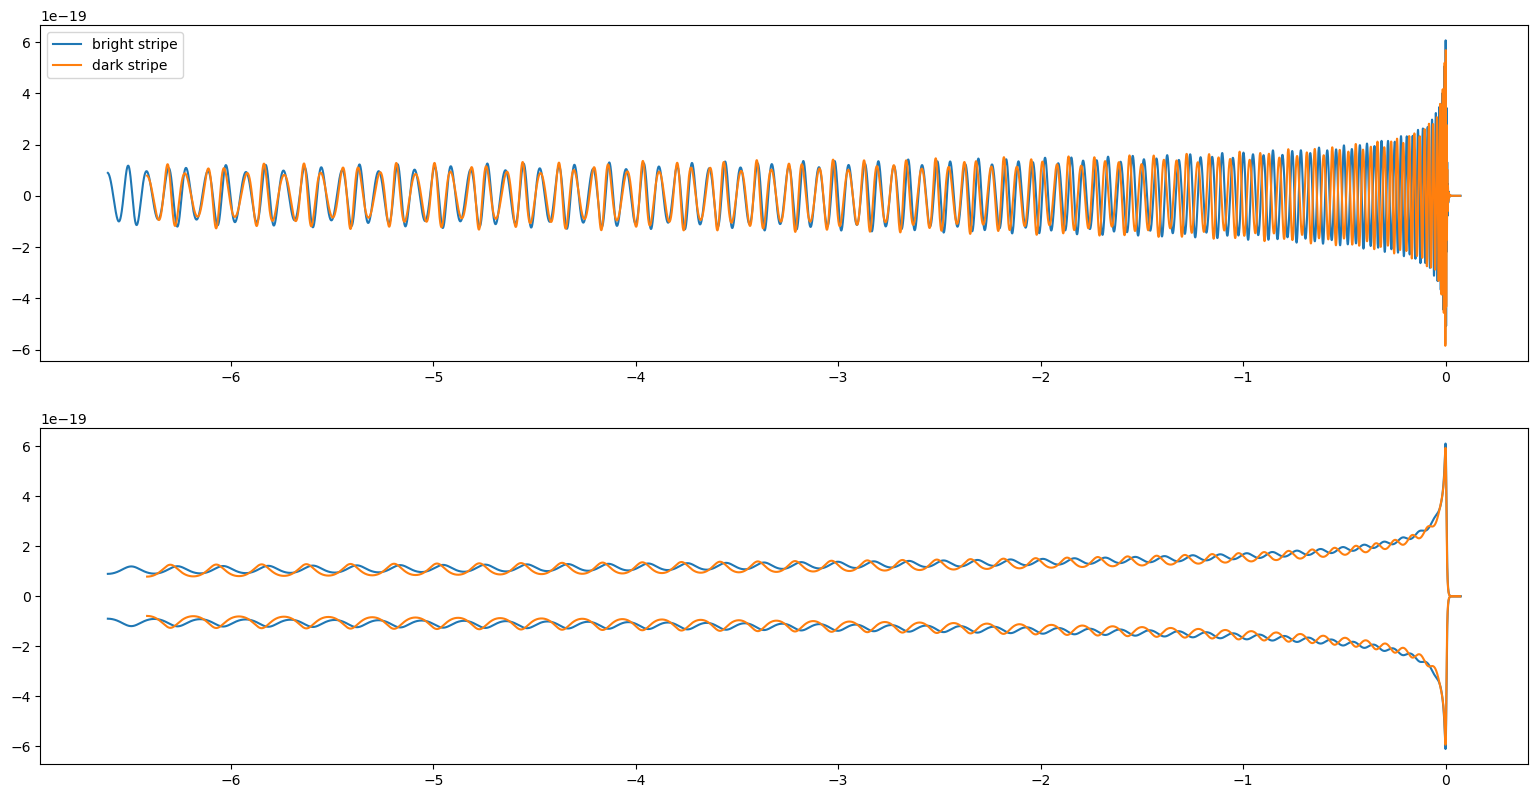

In [145]:
hb = gen_wf(10, 0.0105**0.5, chirp2total(23.75, 2), 2, 4096, 'TEOBResumS')
hd = gen_wf(10, 0.0287**0.5, chirp2total(23.1, 2), 2, 4096, 'TEOBResumS')
plt.figure(figsize=(6.4*3,4.8*2))
plt.subplot(2,1,1)
plt.plot(hb.sample_times, hb, c='C0', label='bright stripe')
plt.plot(hd.sample_times, hd, c='C1', label='dark stripe')
plt.legend()
plt.subplot(2,1,2)
plt.plot(hb.sample_times, np.abs(hb), c='C0')
plt.plot(hb.sample_times, -np.abs(hb), c='C0')
plt.plot(hd.sample_times, np.abs(hd), c='C1')
plt.plot(hd.sample_times, -np.abs(hd), c='C1')

Blue line here is on a bright stripe, orange line on a dark stripe. Although they start close together in amplitude modulations, they are out of phase by the end of inspiral/merger. Interesting to plot also corresponding h2 to this plot here and see how its amplitude modulations line up. Would expect to see that it acts like a waveform on the bright stripe. Will plot n=4, as accuracy of h2 is poor for n=2.

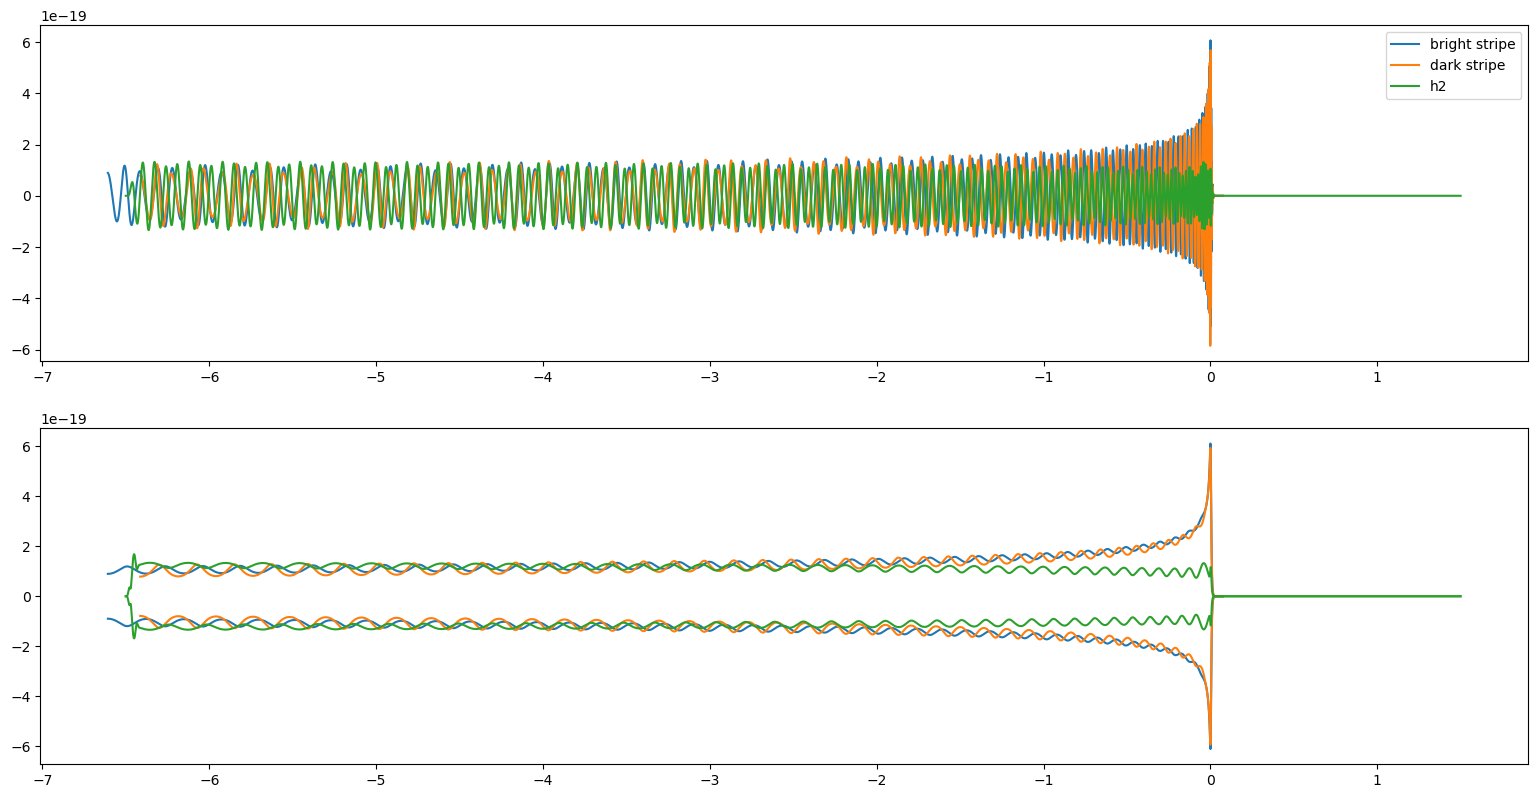

In [144]:
hb = gen_wf(10, 0.0105**0.5, chirp2total(23.75, 2), 2, 4096, 'TEOBResumS')
hd = gen_wf(10, 0.0287**0.5, chirp2total(23.1, 2), 2, 4096, 'TEOBResumS')
_, _, h2, _, _, _, _, _, _ = get_h([1,1,1,1], 10, 0.1, chirp2total(24, 2), 2, 4096)
plt.figure(figsize=(6.4*3,4.8*2))
plt.subplot(2,1,1)
plt.plot(hb.sample_times, hb, c='C0', label='bright stripe')
plt.plot(hd.sample_times, hd, c='C1', label='dark stripe')
plt.plot(h2.sample_times, h2*5, c='C2', label='h2')
plt.legend()
plt.subplot(2,1,2)
plt.plot(hb.sample_times, np.abs(hb), c='C0')
plt.plot(hb.sample_times, -np.abs(hb), c='C0')
plt.plot(hd.sample_times, np.abs(hd), c='C1')
plt.plot(hd.sample_times, -np.abs(hd), c='C1')
plt.plot(h2.sample_times, np.abs(h2*5), c='C2')
plt.plot(h2.sample_times, -np.abs(h2*5), c='C2')

Can indeed see that just before merger, the h2 waveform's amplitude modulations do indeed start to line up with the blue waveform on the blue stripe. Finally, want to look at multiple points on different bright stripes, at both lower and higher masses that the fiducial hn waveforms in order to check that the pattern we see does indeed hold true.

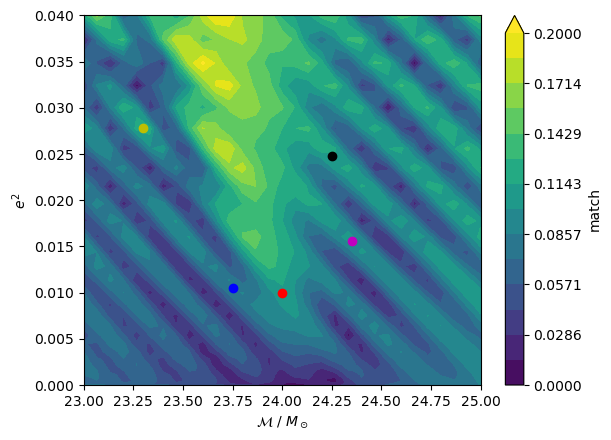

In [162]:
# Load ecc^2 against chirp mass plot
with open(os.path.join('e_sqrd_chirp_data', 'dataslot_8'), 'rb') as fp:
    data = pickle.load(fp)

# Plot data
e_vals = np.linspace(0, 0.2, 31)
chirp_vals = np.linspace(23, 25, 31)
plt.contourf(chirp_vals, e_vals**2, np.array(data['h2'])/np.array(data['h1']), np.linspace(0, 0.2, 15), vmin=0, vmax=0.2, extend='max')
plt.colorbar(label='match')
plt.scatter(24, 0.1**2, c='r', zorder=5)
plt.xlabel('$\mathcal{M}~/~M_\odot$')
plt.ylabel('$e^2$')

# Find points on stripe manually
plt.scatter(23.75, 0.0105, c='b', zorder=3)
plt.scatter(24.35, 0.0156, c='m', zorder=3)
plt.scatter(23.30, 0.0278, c='y', zorder=3)
plt.scatter(24.25, 0.0248, c='k', zorder=3)

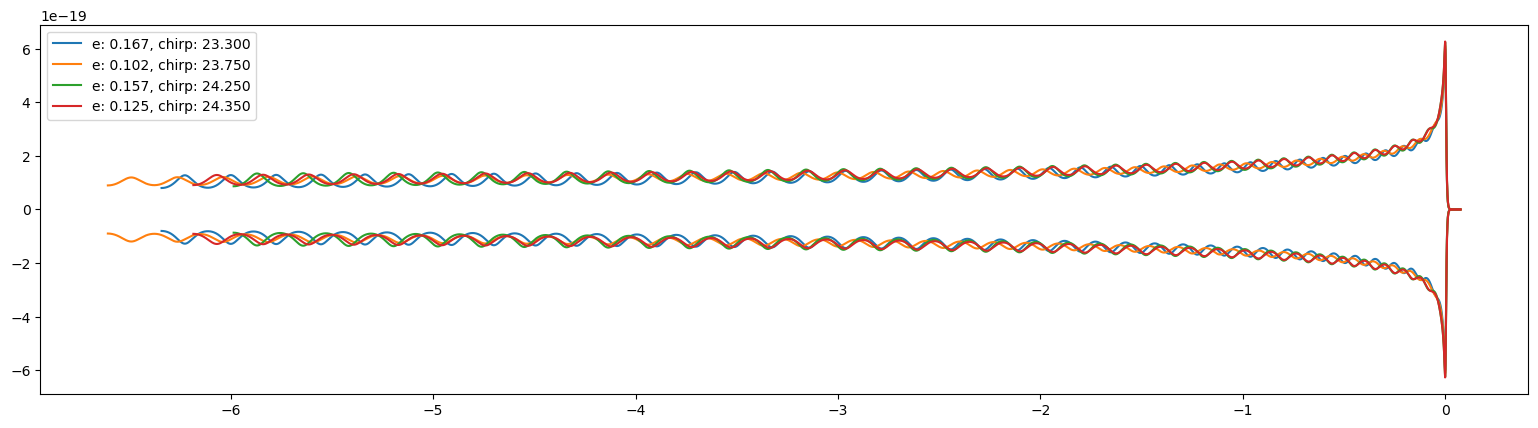

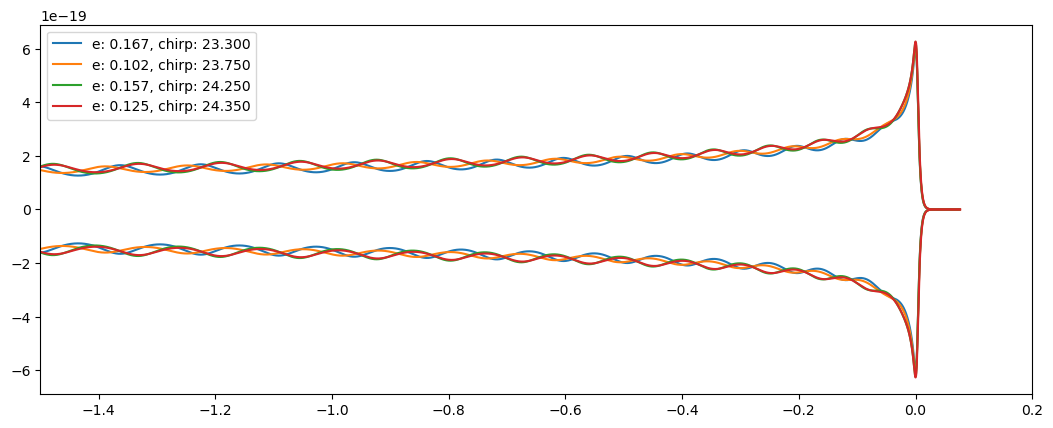

In [120]:
# Points on bright stripes
e2_vals = np.array([0.0278, 0.0105, 0.0248, 0.0156])
chirp_vals = np.array([23.30, 23.75, 24.25, 24.35])
e_vals = np.sqrt(e2_vals)

# Generate and plot waveforms
plt.figure(figsize=(6.4*3, 4.8))
for i in range(len(e_vals)):
    h = gen_wf(10, e_vals[i], chirp2total(chirp_vals[i], 2), 2, 4096, 'TEOBResumS')
    plt.plot(h.sample_times, np.abs(h), c=f'C{i}', label=f'e: {e_vals[i]:.3f}, chirp: {chirp_vals[i]:.3f}')
    plt.plot(h.sample_times, -np.abs(h), c=f'C{i}')
plt.legend()
plt.show()

# Generate and plot waveforms
plt.figure(figsize=(6.4*2, 4.8))
for i in range(len(e_vals)):
    h = gen_wf(10, e_vals[i], chirp2total(chirp_vals[i], 2), 2, 4096, 'TEOBResumS')
    plt.plot(h.sample_times, np.abs(h), c=f'C{i}', label=f'e: {e_vals[i]:.3f}, chirp: {chirp_vals[i]:.3f}')
    plt.plot(h.sample_times, -np.abs(h), c=f'C{i}')
plt.xlim(-1.5,0.2)
plt.legend()
plt.show()

This perhaps not what we expect. Although all lines have similar amplitude modulations in the middle of this signal, the red, green lines are out of phasewith blue, orange lines at the crucial just before merger point. Only connection between these is the chirp mass - is the phasing requirement perhaps different for chirp masses higher than the fiducial waveform?

Let's try picking one eccentricity: 0.1, and plotting waveform for every chirp mass with this eccentricity that lies on a bright stripe. As it is hard to see stripes close to the fiducial waveform's chirp mass, let's plot h2 here instead.

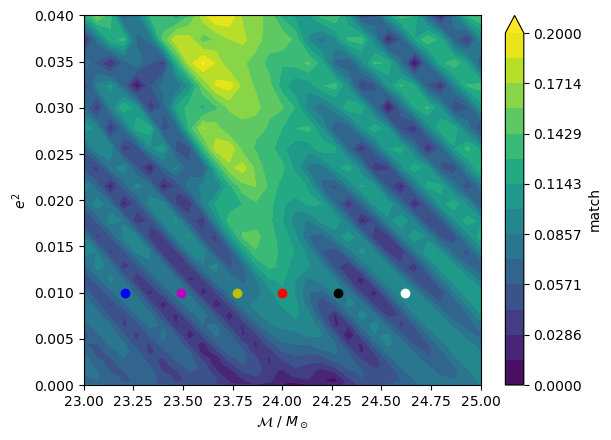

In [161]:
# Load ecc^2 against chirp mass plot
with open(os.path.join('e_sqrd_chirp_data', 'dataslot_8'), 'rb') as fp:
    data = pickle.load(fp)

# Plot data
e_vals = np.linspace(0, 0.2, 31)
chirp_vals = np.linspace(23, 25, 31)
plt.contourf(chirp_vals, e_vals**2, np.array(data['h2'])/np.array(data['h1']), np.linspace(0, 0.2, 15), vmin=0, vmax=0.2, extend='max')
plt.colorbar(label='match')
plt.scatter(24, 0.1**2, c='r', zorder=5)
plt.xlabel('$\mathcal{M}~/~M_\odot$')
plt.ylabel('$e^2$')

# Find points on stripe manually
plt.scatter(23.21, 0.01, c='b', zorder=3)
plt.scatter(23.49, 0.01, c='m', zorder=3)
plt.scatter(23.77, 0.01, c='y', zorder=3)
plt.scatter(24.28, 0.01, c='k', zorder=3)
plt.scatter(24.62, 0.01, c='w', zorder=3)

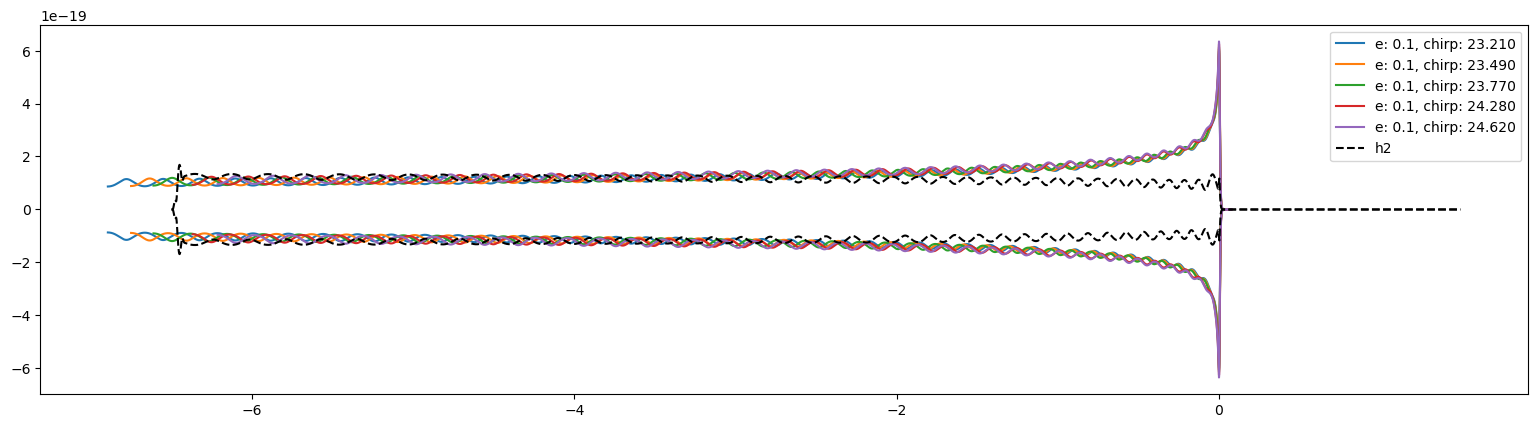

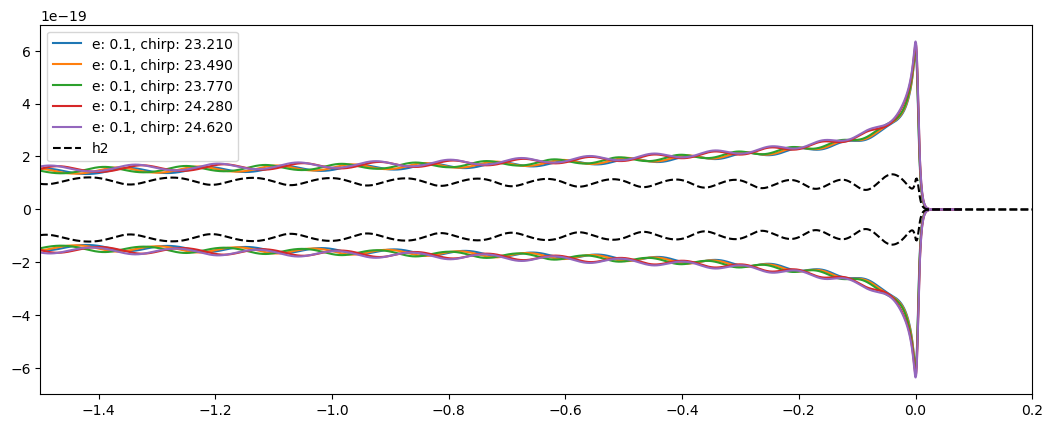

In [137]:
# Points on bright stripes with e=0.1
chirp_vals = np.array([23.21, 23.49, 23.77, 24.28, 24.62])

# Generate and plot waveforms
plt.figure(figsize=(6.4*3, 4.8))
for i in range(len(chirp_vals)):
    h = gen_wf(10, 0.1, chirp2total(chirp_vals[i], 2), 2, 4096, 'TEOBResumS')
    plt.plot(h.sample_times, np.abs(h), c=f'C{i}', label=f'e: 0.1, chirp: {chirp_vals[i]:.3f}')
    plt.plot(h.sample_times, -np.abs(h), c=f'C{i}')
_, _, h2, _, _, _, _, _, _ = get_h([1,1,1,1], 10, 0.1, chirp2total(24, 2), 2, 4096)
plt.plot(h2.sample_times, np.abs(h2*5), c='k', ls='dashed', label='h2')
plt.plot(h2.sample_times, -np.abs(h2*5), c='k', ls='dashed')
plt.legend()
plt.show()

# Generate and plot waveforms
plt.figure(figsize=(6.4*2, 4.8))
for i in range(len(chirp_vals)):
    h = gen_wf(10, 0.1, chirp2total(chirp_vals[i], 2), 2, 4096, 'TEOBResumS')
    plt.plot(h.sample_times, np.abs(h), c=f'C{i}', label=f'e: 0.1, chirp: {chirp_vals[i]:.3f}')
    plt.plot(h.sample_times, -np.abs(h), c=f'C{i}')
_, _, h2, _, _, _, _, _, _ = get_h([1,1,1,1], 10, 0.1, chirp2total(24, 2), 2, 4096)
plt.plot(h2.sample_times, np.abs(h2*5), c='k', ls='dashed', label='h2')
plt.plot(h2.sample_times, -np.abs(h2*5), c='k', ls='dashed')
plt.xlim(-1.5,0.2)
plt.legend()
plt.show()

Again separated into two groups: those with chirp masses lower than hn wfs, and those with chirp masses higher. It appears that the h2 waveform lines up fairly well with the lower group here before merger, however this is not perfect. One possible hypothesis is that the amplitude modulations here can be either in phase of 180 degrees out of phase in order to match well and be on a bright stripe. This is consistent with the comparison earlier with a point on a dark stripe, which was not exactly 180 degrees out of phase. Further support for this is that the amplitude modulations of a waveform generated at e=0.1, chirp=24 has amplitude modulations similar to the red/purple group, i.e. 180 degrees out of phase with the h2 waveform made from it.

Let's now plot waveforms for points between two successive stripes (still fixing ecc, varying just chirp mass), and see how amplitude modulations here vary from one stripe to the next).

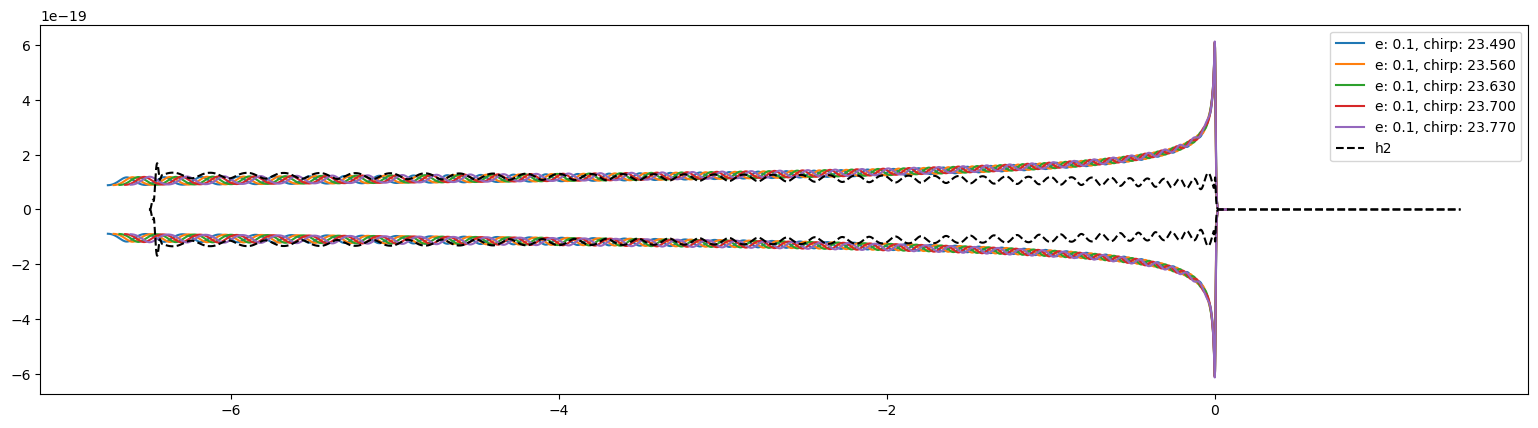

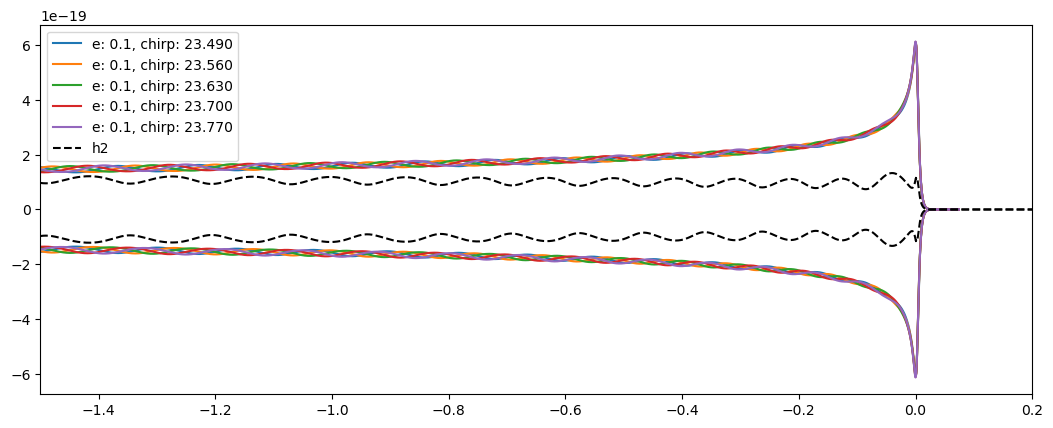

In [150]:
# Points on bright stripes with e=0.1
chirp_vals = np.linspace(23.49, 23.77, 5)

# Generate and plot waveforms
plt.figure(figsize=(6.4*3, 4.8))
for i in range(len(chirp_vals)):
    h = gen_wf(10, 0.1, chirp2total(chirp_vals[i], 2), 2, 4096, 'TEOBResumS')
    plt.plot(h.sample_times, np.abs(h), c=f'C{i}', label=f'e: 0.1, chirp: {chirp_vals[i]:.3f}')
    plt.plot(h.sample_times, -np.abs(h), c=f'C{i}')
_, _, h2, _, _, _, _, _, _ = get_h([1,1,1,1], 10, 0.1, chirp2total(24, 2), 2, 4096)
plt.plot(h2.sample_times, np.abs(h2*5), c='k', ls='dashed', label='h2')
plt.plot(h2.sample_times, -np.abs(h2*5), c='k', ls='dashed')
plt.legend()
plt.show()

# Generate and plot waveforms
plt.figure(figsize=(6.4*2, 4.8))
for i in range(len(chirp_vals)):
    h = gen_wf(10, 0.1, chirp2total(chirp_vals[i], 2), 2, 4096, 'TEOBResumS')
    plt.plot(h.sample_times, np.abs(h), c=f'C{i}', label=f'e: 0.1, chirp: {chirp_vals[i]:.3f}')
    plt.plot(h.sample_times, -np.abs(h), c=f'C{i}')
_, _, h2, _, _, _, _, _, _ = get_h([1,1,1,1], 10, 0.1, chirp2total(24, 2), 2, 4096)
plt.plot(h2.sample_times, np.abs(h2*5), c='k', ls='dashed', label='h2')
plt.plot(h2.sample_times, -np.abs(h2*5), c='k', ls='dashed')
plt.xlim(-1.5,0.2)
plt.legend()
plt.show()

We see that the full range of possible amplitude modulations are covered here, so simply being exactly 0 or 180 degrees in phase cannot be the full story. Looking at the ecc^2 against chirp plot, it appears that bright stripes become dark stripes when crossing the degeneracy, and vice versa, supporting the 'flip' that we see here. The ecc^2 against chirp plots of cos(phase difference) however do not support this flip, showing a constant 'sign' across the degeneracy line.

Let's try plotting the array of points at e=0.1 which lie on bright stripes in h2/h1 onto the ecc^2 against chirp mass plot of cos(diff_phase), and see where they lie here.

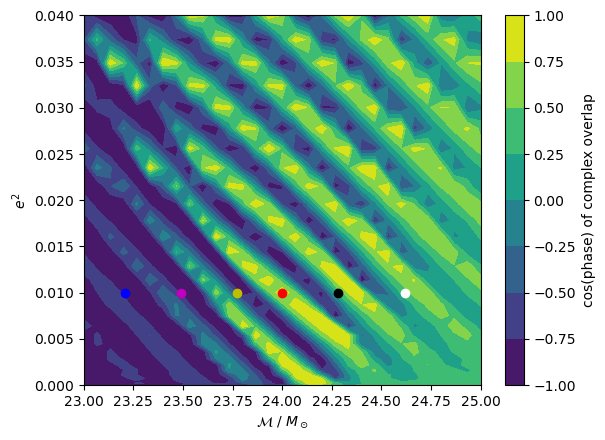

In [166]:
# Load ecc^2 against chirp mass plot
with open(os.path.join('e_sqrd_chirp_data', 'dataslot_8'), 'rb') as fp:
    data = pickle.load(fp)

# Plot data
e_vals = np.linspace(0, 0.2, 31)
chirp_vals = np.linspace(23, 25, 31)
plt.contourf(chirp_vals, e_vals**2, np.cos(np.array(data['diff_phase'])))
plt.colorbar(label='cos(phase) of complex overlap')
plt.scatter(24, 0.1**2, c='r', zorder=5)
plt.xlabel('$\mathcal{M}~/~M_\odot$')
plt.ylabel('$e^2$')

# Find points on stripe manually
plt.scatter(23.21, 0.01, c='b', zorder=3)
plt.scatter(23.49, 0.01, c='m', zorder=3)
plt.scatter(23.77, 0.01, c='y', zorder=3)
plt.scatter(24.28, 0.01, c='k', zorder=3)
plt.scatter(24.62, 0.01, c='w', zorder=3)

See that the first set are now on the upper-right boundary of the bright stripes, and the second set on the lower-left boundary.